# 🧑‍🍳 L4 - Frozen dinner: The design thinking meal

Inventory:

1. Kernel
2. Semantic (and Native) functions -- you can do a lot with these
3. BusinessThinking plugin --> SWOTs in ways you could never imagine
4. DesignThinking plugin ... Here you are

# 🔥 Get a kernel ready

In [1]:
import semantic_kernel as sk
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion, OpenAIChatCompletion
from IPython.display import display, Markdown

kernel = sk.Kernel()

useAzureOpenAI = False

if useAzureOpenAI:
    deployment, api_key, endpoint = sk.azure_openai_settings_from_dot_env()
    kernel.add_text_completion_service("azureopenai", AzureChatCompletion(deployment, endpoint, api_key))
else:
    api_key, org_id = sk.openai_settings_from_dot_env()
    kernel.add_text_completion_service("openai", OpenAIChatCompletion("gpt-3.5-turbo-0301", api_key, org_id))

print("A kernel is now ready.")    

A kernel is now ready.


## 🏁 Let's start backwards from the customer

```directory
plugins-sk/
│
└─── DesignThinking/
     |
     └─── Define/
     |    └─── config.json
     |    └─── skprompt.txt
     |
     └─── Empathize/
          └─── config.json
          └─── skprompt.txt

```

In [2]:
import json

pluginsDirectory = "./plugins-sk"

strength_questions = ["What unique recipes or ingredients does the pizza shop use?","What are the skills and experience of the staff?","Does the pizza shop have a strong reputation in the local area?","Are there any unique features of the shop or its location that attract customers?", "Does the pizza shop have a strong reputation in the local area?", "Are there any unique features of the shop or its location that attract customers?"]
weakness_questions = ["What are the operational challenges of the pizza shop? (e.g., slow service, high staff turnover)","Are there financial constraints that limit growth or improvements?","Are there any gaps in the product offering?","Are there customer complaints or negative reviews that need to be addressed?"]
opportunities_questions = ["Is there potential for new products or services (e.g., catering, delivery)?","Are there under-served customer segments or market areas?","Can new technologies or systems enhance the business operations?","Are there partnerships or local events that can be leveraged for marketing?"]
threats_questions = ["Who are the major competitors and what are they offering?","Are there potential negative impacts due to changes in the local area (e.g., construction, closure of nearby businesses)?","Are there economic or industry trends that could impact the business negatively (e.g., increased ingredient costs)?","Is there any risk due to changes in regulations or legislation (e.g., health and safety, employment)?"]

strengths = [ "Unique garlic pizza recipe that wins top awards","Owner trained in Sicily","Strong local reputation","Prime location on university campus" ]
weaknesses = [ "High staff turnover","Floods in the area damaged the seating areas that are in need of repair","Absence of popular calzones from menu","Negative reviews from younger demographic for lack of hip ingredients" ]
opportunities = [ "Untapped catering potential","Growing local tech startup community","Unexplored online presence and order capabilities","Upcoming annual food fair" ]
threats = [ "Competition from cheaper pizza businesses nearby","There's nearby street construction that will impact foot traffic","Rising cost of cheese will increase the cost of pizzas","No immediate local regulatory changes but it's election season" ]

customer_comments = """
Customer 1: The seats look really raggedy.
Customer 2: The garlic pizza is the best on this earth.
Customer 3: I've noticed that there's a new server every time I visit, and they're clueless.
Customer 4: Why aren't there calzones?
Customer 5: I love the garlic pizza and can't get it anywhere else.
Customer 6: The garlic pizza is exceptional.
Customer 7: I prefer a calzone's portable nature as compared with pizza.
Customer 8: Why is the pizza so expensive?
Customer 9: There's no way to do online ordering.
Customer 10: Why is the seating so uncomfortable and dirty?
"""

pluginDT = kernel.import_semantic_skill_from_directory(pluginsDirectory, "DesignThinking");
my_result = await kernel.run_async(pluginDT["Empathize"], input_str=customer_comments)

display(Markdown("## ✨ The categorized observations from the 'Empathize' phase of design thinking\n"))

print(json.dumps(json.loads(str(my_result)), indent=2))

## ✨ The categorized observations from the 'Empathize' phase of design thinking


[
  {
    "sentiment": "Negative",
    "summary": "Complaints about the appearance and cleanliness of the restaurant"
  },
  {
    "sentiment": "Positive",
    "summary": "Praise for the garlic pizza"
  },
  {
    "sentiment": "Negative",
    "summary": "Frustration with the lack of consistency and knowledge among servers"
  },
  {
    "sentiment": "Negative",
    "summary": "Requests for calzones and complaints about their absence"
  },
  {
    "sentiment": "Negative",
    "summary": "Concerns about the cost and discomfort of the seating"
  }
]


![](https://s172-31-2-34p42319.lab-aws-production.deeplearning.ai/notebooks/assets/designthinking.png)

**Note:** LLMs do not necessarily produce the same result each time. Your results may be different than the video.

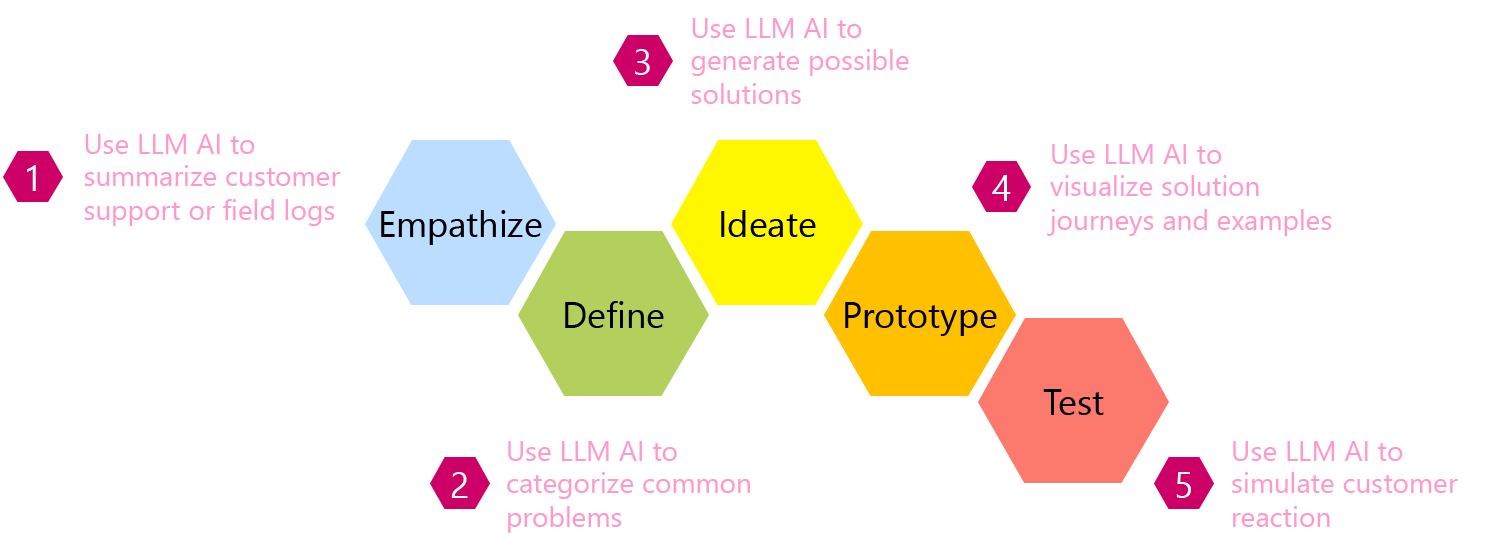

In [3]:
my_result = await kernel.run_async(pluginDT["Empathize"], pluginDT["Define"], input_str = customer_comments)

display(Markdown("## ✨ The categorized observations from the 'Empathize' + 'Define' phases of design thinking\n"+str(my_result)))

## ✨ The categorized observations from the 'Empathize' + 'Define' phases of design thinking
| Analysis | Definition | Possible Source |
| --- | --- | --- |
| Complaints about restaurant appearance and cleanliness | Customers express dissatisfaction with the appearance and cleanliness of the restaurant | Lack of proper cleaning and maintenance by restaurant staff |
| Praise for garlic pizza | Customers express satisfaction with the taste and quality of the garlic pizza | High quality ingredients and proper preparation by restaurant staff |
| Concerns about service quality | Customers express concerns about the quality of service provided by the restaurant staff | Inadequate training or understaffing of restaurant employees |
| Questioning absence of calzones and high prices | Customers question the absence of calzones on the menu and express concerns about high prices | Menu design and pricing strategy decisions made by restaurant management |
| Discomfort with seating and lack of online ordering options | Customers express discomfort with the seating arrangements and lack of online ordering options | Restaurant layout and technology limitations for online ordering |

## ✨ The categorized observations from the 'Empathize' + 'Define' phases of design thinking

| Analysis | Definition | Possible Source |
| --- | --- | --- |
| Complaints about restaurant appearance and cleanliness | Customers express dissatisfaction with the appearance and cleanliness of the restaurant | Lack of proper cleaning and maintenance by restaurant staff |
| Praise for garlic pizza | Customers express satisfaction with the taste and quality of the garlic pizza | High quality ingredients and proper preparation by restaurant staff |
| Concerns about service quality | Customers express concerns about the quality of service provided by the restaurant staff | Inadequate training or understaffing of restaurant employees |
| Questioning absence of calzones and high prices | Customers question the absence of calzones on the menu and express concerns about high prices | Menu design and pricing strategy decisions made by restaurant management |
| Discomfort with seating and lack of online ordering options | Customers express discomfort with the seating arrangements and lack of online ordering options | Restaurant layout and technology limitations for online ordering |

In [ ]:
my_result = await kernel.run_async(pluginDT["Empathize"], pluginDT["Define"], pluginDT["Ideate"], pluginDT["PrototypeWithPaper"], input_str=customer_comments)

display(Markdown("## ✨ The categorized observations from the 'Empathize' + 'Define' + 'Ideate' + 'Prototype' + phases of design thinking\n"+str(my_result)))

## ✨ The categorized observations from the 'Empathize' + 'Define' + 'Ideate' + 'Prototype' + phases of design thinking

1.  Replace outdated furniture with more comfortable and modern seating:

-   Draw a simple floor plan of the restaurant and mark the areas where the old furniture will be replaced with new ones.
-   Create a list of furniture suppliers and their contact information to facilitate the ordering process.

2.  Offer a garlic pizza special or promotion to encourage more sales:

-   Create a mock-up of a promotional poster or flyer that advertises the garlic pizza special.
-   Write a sample social media post that promotes the special and includes a call-to-action for customers to visit the restaurant.

3.  Provide servers with scripts and training to handle customer complaints about seating:

-   Write a sample script that servers can use to address customer complaints about seating.
-   Create a training manual that outlines the steps servers should take when handling customer complaints.

4.  Offer a loyalty program to incentivize repeat customers:

-   Create a mock-up of a loyalty card that customers can use to earn rewards.
-   Write a sample email or text message that announces the launch of the loyalty program and encourages customers to sign up.

5.  Improve restaurant ambiance with updated decor and lighting:

-   Create a mood board that includes images of the new decor and lighting options.
-   Write a list of potential suppliers for the new decor and lighting.

6.  Create a social media presence to engage with customers and promote specials:

-   Create a mock-up of a social media post that promotes a current special or promotion.
-   Write a sample response to a customer comment or question on social media.

7.  Offer a variety of non-pizza menu items to appeal to a wider range of customers:

-   Create a list of potential non-pizza menu items and their ingredients.
-   Write a sample menu description for a new non-pizza item.

8.  Provide customers with a comment card to gather feedback on their dining experience:

-   Create a mock-up of a comment card that includes questions about the customer's dining experience.
-   Write a sample response to a customer comment or suggestion.

9.  Partner with local businesses to offer discounts or promotions to their employees:

-   Create a list of potential local businesses to partner with and their contact information.
-   Write a sample email or letter that proposes a partnership with a local business.

10.  Offer a takeout or delivery service to increase convenience for customers:

-   Create a mock-up of a takeout or delivery menu that includes all available options.
-   Write a sample email or text message that announces the launch of the takeout or delivery service and encourages customers to place an order.

In [ ]:
sk_prompt = """
A 40-year old man who has just finished his shift at work and comes into the bar. They are in a bad mood.

They are given an experience like:
{{$input}}

Summarize their possible reactions to this experience.
"""
test_function = kernel.create_semantic_function(prompt_template=sk_prompt,
                                                    description="Simulates reaction to an experience.",
                                                    max_tokens=1000,
                                                    temperature=0.1,
                                                    top_p=0.5)
sk_input="""
A simple loyalty card that includes details such as the rewards for each level of loyalty, 
how to earn points, and how to redeem rewards is given to every person visiting the bar.
"""

test_result = await kernel.run_async(test_function, input_str=sk_input) 

display(Markdown("### ✨ " + str(test_result)))

### ✨ As an AI language model, I cannot predict the exact reactions of the 40-year old man in this scenario. However, some possible reactions could be:

-   They might feel indifferent towards the loyalty card and not bother to use it.
-   They might feel slightly interested in the rewards and consider using the loyalty card in the future.
-   They might feel annoyed or frustrated that they have to go through the process of earning points and redeeming rewards, especially if they are already in a bad mood.
-   They might feel pleasantly surprised and appreciate the gesture of the bar offering a loyalty program.
-   They might feel motivated to visit the bar more often to earn rewards and reach higher levels of loyalty.